In [1]:
import math
import random

import torch
from referencing.retrieval import to_cached_resource
from torch.onnx.symbolic_opset9 import tensor


<h1>深度学习基础</h2>
1.tensor
   在矩阵论中，一个单独的数可以称为一个标量，一列或一行数组可以构成向量，一个二维数组可以构成矩阵，矩阵中的每一个元素都可以被行索引或者列索引唯一确定，如果数组的维度超过2,则可以称该数组为张量(Tensor)。不同于数学中的表示PyTorch中的张量是一个泛化的概念，它是一种数据结构,可以是一个标量、一个向量、一个矩阵,甚至是更高维度的数组。

1.创建张量

In [2]:
#创建张量的四种方式

#1.使用torch.tensor
torch_type1=torch.tensor([[1,2],[2,3],[4,6]],dtype=torch.float32)  #dtype为数据类型 类型 主要为int float

#2.使用内置函数如torch.rand及其他函数
torch_type2=torch.rand([2,3,4]) 
torch_type2=torch.ones([2,3,4])  #全为1
torch_type2=torch.zeros([2,3,4]) #全为0
torch_type2=torch.eye(4)   #单位张量
torch_type2=torch.randint(0,100,[2,3,4])  #均匀分布的张量  参数 下限 上限 维度
print(torch_type2)

#3.通过张量生成其他形状相同的张量
torch_type3=torch.zeros_like(torch_type1)
torch_type3=torch.ones_like(torch_type1)
torch_type3=torch.rand_like(torch_type1) #[0，1]之间均匀分布
torch_type3=torch.randn_like(torch_type1)#[0，1]之间正态分布




print(torch_type1,torch_type2,torch_type3)


tensor([[[38, 13,  1,  5],
         [74, 13, 26, 28],
         [42,  0, 66, 50]],

        [[73,  4, 36, 22],
         [31, 91, 45, 15],
         [93, 96, 93, 82]]])
tensor([[1., 2.],
        [2., 3.],
        [4., 6.]]) tensor([[[38, 13,  1,  5],
         [74, 13, 26, 28],
         [42,  0, 66, 50]],

        [[73,  4, 36, 22],
         [31, 91, 45, 15],
         [93, 96, 93, 82]]]) tensor([[-0.7111,  0.7058],
        [-1.0754, -0.6646],
        [ 0.5053, -0.0043]])


2.张量操作





![张量维度](pic/张量维度.jpg)




In [3]:

torch_type2_shape=torch_type2.shape#tensor的形状


torch_type2_dtype=torch_type2.dtype#tensor的数据类型

#查看维度属性
print(torch_type2)
print(torch_type2.ndimension()) #张量维度
print(torch_type2.nelement())  #元素个数
torch_type2_size=torch_type2.size()#tensor的维度大小


print(torch_type2_shape,torch_type2_dtype,torch_type2_size)


#改变维度属性

a=torch.randn(12)

#view直接改变张量本身
print(a.view(3,4))
print(a.view(4,3))
print(a.view(-1,4))#加入新的张量有N维，可以指定其他N-1维的具体大小，留下的一个维度大小指定为-1，PyTorch会自动计算那个维度的大小


#reshape生成一个新的张量
a=torch.randn(12)
print(a.reshape(3,4))


#索引和切片， 其实就是张量取值
a= torch.randn(2,3,4)
print('a',a)
#取最后一个值，序列从0开始
print(a[1,2,3])

a= torch.randn(10,20)

torch_type2_shape = torch_type2.shape  #tensor的形状

torch_type2_dtype = torch_type2.dtype  #tensor的数据类型

#查看维度属性
print(torch_type2)
print(torch_type2.ndimension())  #张量维度
print(torch_type2.nelement())  #元素个数
torch_type2_size = torch_type2.size()  #tensor的维度大小

print(torch_type2_shape, torch_type2_dtype, torch_type2_size)

#改变维度属性

a = torch.randn(12)

#view直接改变张量本身
print(a.view(3, 4))
print(a.view(4, 3))
print(a.view(-1, 4))  #加入新的张量有N维，可以指定其他N-1维的具体大小，留下的一个维度大小指定为-1，PyTorch会自动计算那个维度的大小

#reshape生成一个新的张量
a = torch.randn(12)
print(a.reshape(3, 4))

#索引和切片， 其实就是张量取值，切片操作左闭右开
a = torch.randn(2, 3, 4)
print('a', a)
print(a[1, 2, 3])#取最后一个值，序列从0开始
a = torch.randn(2,20)
print('a', a) 
print('a', a[:,1:5])    #从第二2到第四个
print('a', a[:,1:-1])   #: 取所有   -1 最后一个 1:-1从第二2到倒数第而个
print(a>0)#掩码
print('a>0',a[a>0])#根据掩码取元素


#单张量运算

a=torch.randn(3,4)
print(a.sqrt())
print(a.sqrt_)
print(torch.sum(a))

torch_type2_shape = torch_type2.shape  #tensor的形状

torch_type2_dtype = torch_type2.dtype  #tensor的数据类型

#查看维度属性
print(torch_type2)
print(torch_type2.ndimension())  #张量维度
print(torch_type2.nelement())  #元素个数
torch_type2_size = torch_type2.size()  #tensor的维度大小

print(torch_type2_shape, torch_type2_dtype, torch_type2_size)

#改变维度属性

a = torch.randn(12)

#view直接改变张量本身
print(a.view(3, 4))
print(a.view(4, 3))
print(a.view(-1, 4))  #加入新的张量有N维，可以指定其他N-1维的具体大小，留下的一个维度大小指定为-1，PyTorch会自动计算那个维度的大小

#reshape生成一个新的张量
a = torch.randn(12)
print(a.reshape(3, 4))

#索引和切片， 其实就是张量取值
a = torch.randn(2, 3, 4)
print('a', a)
#取最后一个值，序列从0开始
print(a[1, 2, 3])

a = torch.randn(10, 20)

torch_type2_shape = torch_type2.shape  #tensor的形状

torch_type2_dtype = torch_type2.dtype  #tensor的数据类型

#查看维度属性
print(torch_type2)
print(torch_type2.ndimension())  #张量维度
print(torch_type2.nelement())  #元素个数
torch_type2_size = torch_type2.size()  #tensor的维度大小

print(torch_type2_shape, torch_type2_dtype, torch_type2_size)

#改变维度属性

a = torch.randn(12)

#view直接改变张量本身
print(a.view(3, 4))
print(a.view(4, 3))
print(a.view(-1, 4))  #加入新的张量有N维，可以指定其他N-1维的具体大小，留下的一个维度大小指定为-1，PyTorch会自动计算那个维度的大小

#reshape生成一个新的张量
a = torch.randn(12)
print(a.reshape(3, 4))

#索引和切片， 其实就是张量取值，切片操作左闭右开
a = torch.randn(2, 3, 4)
print('a', a)
print(a[1, 2, 3])  #取最后一个值，序列从0开始
a = torch.randn(2, 20)
print('a', a)
print('a', a[:, 1:5])  #从第二2到第四个
print('a', a[:, 1:-1])  #: 取所有   -1 最后一个 1:-1从第二2到倒数第而个
print(a > 0)  #掩码
print('a>0', a[a > 0])  #根据掩码取元素



#单张量运算
a = torch.randn(3, 4)
print(a.sqrt()) #平方根
print(a.sqrt_)  #平方根 带_的一般会直接修改原张量的值
print(torch.sum(a))   #求和
print(torch.sum(a,[0,1])) #前两行求和
print(torch.mean(a,[0,1]))#前两行求评价值


#多张量运算
a = torch.randn(2, 3)
b= torch.randn(2, 3)
print(a+b,a.add(b))
print(a*b,a.mul(b))
print(a-b,a.sub(b))
print(a/b,a.div(b))

#极值和排序
a = torch.randn(2,3,4)
print(a)
#按
print('torch.argmax(a,0)',torch.argmax(a[0],dim=0))
print('torch.argmax(a,1)',torch.argmax(a[0],1))
#这里需要argmax这个函数二维和多维是有区别的，如果按照二维，把dim=0想象为列 dim=1想象为行，再多维就是就问题了。
#dim实际上可以理解为降维，【【【。。。】】】 dim为0实际上就是取消第一个维度 就是左边第一个大括号，这样如果你是【【。A。】，【。B。】】实际上就是把a和b合并成一个，对应的元素取ab最大值
#dim=1  实际上就是取消第二个括号【【【A】【B】】，【【A】【B】】】 变成【【AB】，【AB】】AB这样就必须按行合并变成一个了
print('torch.argmax(a,1)',torch.argmax(a,0)) 
print('torch.argmax(a,1)',torch.argmax(a,1))

#最小值
print(torch.argmin(a,-1))
#按照最后一维排序
print(a.sort(-1))



tensor([[[38, 13,  1,  5],
         [74, 13, 26, 28],
         [42,  0, 66, 50]],

        [[73,  4, 36, 22],
         [31, 91, 45, 15],
         [93, 96, 93, 82]]])
3
24
torch.Size([2, 3, 4]) torch.int64 torch.Size([2, 3, 4])
tensor([[ 0.4355, -0.0226, -0.8517,  0.7612],
        [-0.5933,  0.2165,  0.8011, -0.3715],
        [ 1.1596, -0.7587,  0.1460, -0.3302]])
tensor([[ 0.4355, -0.0226, -0.8517],
        [ 0.7612, -0.5933,  0.2165],
        [ 0.8011, -0.3715,  1.1596],
        [-0.7587,  0.1460, -0.3302]])
tensor([[ 0.4355, -0.0226, -0.8517,  0.7612],
        [-0.5933,  0.2165,  0.8011, -0.3715],
        [ 1.1596, -0.7587,  0.1460, -0.3302]])
tensor([[-1.0235, -1.3416, -0.9147,  0.5012],
        [-0.6159,  0.0552, -0.0886, -1.2366],
        [-1.4607, -1.3360,  1.8353,  1.5966]])
a tensor([[[-1.8685,  0.1105,  2.1302,  0.8623],
         [-1.6412, -1.7401, -0.1081,  0.7311],
         [-0.4202, -0.7579, -0.3072,  0.8648]],

        [[-0.8849,  1.3834, -0.0451, -1.6900],
         [-2.14

3.矩阵运算

In [4]:
#矩阵运算的三种方法  torch函数 内置函数  @
a=torch.randint(0,10,[3,4])
b=torch.randint(0,10,[4,3])

print(torch.mm(a,b))
print(a.mm(b))
print(a@b)

a=torch.randint(0,10,[2,3,4])
b=torch.randint(0,10,[2,4,3])
#批处理 可以看到@符号可以处理二维和多维是最简单的
print(torch.bmm(a,b))
print(a.bmm(b))
print(a@b)

tensor([[66, 72, 24],
        [97, 82, 55],
        [58, 41, 35]])
tensor([[66, 72, 24],
        [97, 82, 55],
        [58, 41, 35]])
tensor([[66, 72, 24],
        [97, 82, 55],
        [58, 41, 35]])
tensor([[[ 80,  40,  68],
         [ 89,  68,  88],
         [122,  80,  92]],

        [[111,  65,  72],
         [ 95,  57,  80],
         [124,  73,  97]]])
tensor([[[ 80,  40,  68],
         [ 89,  68,  88],
         [122,  80,  92]],

        [[111,  65,  72],
         [ 95,  57,  80],
         [124,  73,  97]]])
tensor([[[ 80,  40,  68],
         [ 89,  68,  88],
         [122,  80,  92]],

        [[111,  65,  72],
         [ 95,  57,  80],
         [124,  73,  97]]])


4.张量的拼接和分割

In [5]:
a=torch.randn(3,4)
b=torch.randn(3,4)
c=torch.randn(2,3,4)
d=torch.randn(2,3,4)

#这里和argmax相反  比如 【【a】】 【【b】】合并dim为0说明从第一个大括号合并 结果为【【a】,【b】】 如果dmi=1 按照第二个大括号合并 则【【【a】【b】【c】】】【【【a】【b】【c】】】为【【【【a】【a】】
# 【【b】【b】】 【【c】【c】】】】
#print(torch.stack([a,b],dim=0))
#print(torch.stack([a,b],dim=1))
#print(torch.stack([a,b],dim=-1))

#print(c)
a=torch.randn(3,4)
b=torch.randn(3,1)
print(b)
#cat可以拼接维度不同的张量
#print(torch.cat([a,b],dim=0))
print(torch.cat([a,b],dim=1))
print(torch.cat([a,b],dim=-1))
#print(torch.stack([c,d],dim=0))
#print(torch.stack([c,d],dim=1))
print(torch.stack([c,d],dim=-1))


#张量的分割
#按照0维分割，在维护里面可以想想成按行分割
print(a.split([1,2],dim=0))
#按照1维分割，在维护里面可以想想成按列分割
print(a.split([2,2],dim=1))

#chunk这里只能输入份数，不能指定每一个张量的大小
print(a.chunk(3,dim=0))

#增加维度
print(a.shape)
print(a.unsqueeze(-1).shape)
print(a.unsqueeze(0).shape)
print(a.unsqueeze(1).shape)

tensor([[-1.8082],
        [ 0.3185],
        [-0.0662]])
tensor([[-0.3299, -0.4879,  1.0841, -1.2850, -1.8082],
        [-0.7496, -1.7717,  1.1220,  0.5112,  0.3185],
        [ 1.1637,  1.0673,  0.8199,  0.0132, -0.0662]])
tensor([[-0.3299, -0.4879,  1.0841, -1.2850, -1.8082],
        [-0.7496, -1.7717,  1.1220,  0.5112,  0.3185],
        [ 1.1637,  1.0673,  0.8199,  0.0132, -0.0662]])
tensor([[[[-1.1935, -0.8042],
          [-0.0605, -2.4430],
          [-0.2489,  0.4518],
          [-1.8343,  0.7571]],

         [[ 0.8876, -0.1279],
          [-1.0778, -1.2961],
          [-0.1931,  0.5335],
          [ 0.1544,  0.2760]],

         [[ 0.9350, -0.5502],
          [-1.5940, -0.4596],
          [-0.5485,  0.9564],
          [ 0.0584,  0.5668]]],


        [[[ 1.2922, -0.3347],
          [-0.5870,  1.6790],
          [-0.4728,  1.6073],
          [-0.8137, -1.0857]],

         [[-1.3816,  0.2951],
          [ 0.9542,  0.0772],
          [-0.4644,  0.1834],
          [ 0.4454, -1.4782]],

<h1>torch.nn模块</h1>


卷积介绍 这里仅介绍 神经网络中卷积的概念
卷积（Convolution）：卷积是一种数学运算，在CNN中，它通过滑动窗口（也称为卷积核或滤波器）在输入图像或特征图上滑动，并计算窗口内元素与对应卷积核元素的加权和（包括偏置项），从而生成输出特征图。

卷积是一种特殊的线性运算，用于提取图像中的局部特征。CNN通过使用一个或多个卷积核（也称为滤波器或特征检测器）在输入数据（如图像）上进行滑动窗口操作来提取特征。
<br>**可以理解成比如图片是一个二维数组，再提取特征的时候，如果全部提取单个像素点，都先像素点非常大，其次忽略了像素点的关联关系,如果使用卷积提取，首先会降维降低运算量，其次可以考虑相邻点的关联关系**





kernel:卷积核（Convolution Kernel）,一个可学习的权重矩阵，其大小通常远小于输入图像的大小，用于在输入图像上滑动并进行元素级的乘法累加操作。<br>
output:特征图（Feature Map）,卷积操作的结果，每个特征图都代表了输入图像在不同卷积核下的特征响应。

  ![卷积](pic/动态卷积.gif)
计算过程

计算过程


![卷积](pic/卷积计算.png)
![卷积](pic/动态卷积1.gif)




<h2>卷积的重要参数</h2>
卷积核大小（Kernel Size）：决定了感受野的大小，即每次卷积操作能够覆盖的输入区域大小。<br>
步长（Stride）：决定了卷积核在输入图像或特征图上滑动的距离。步长为1表示每次滑动一个像素，步长大于1则表示每次滑动多个像素。<br>
填充（Padding）：在输入图像或特征图的边缘添加额外的零值，以控制输出特征图的尺寸。常见的填充方式有“valid”（无填充）和“same”（填充后输出尺寸与输入相同）。<br>
    如果不使用填充，可能你卷子核的值设置的很小或者0，会造成边界信息丢失<br>
通道数（Channels）：对于输入图像，通道数指的是颜色通道数（如RGB图像的通道数为3）。对于卷积层，输出特征图的通道数由卷积核的数量决定。<br>





![](pic/卷积填充.png)

<h2>n维卷积 Conv1d 2d 3d</h2>!<br>
卷积维度：一般情况下 ，卷积核在几个维度上滑动就是几维卷积。

![](pic/n维卷积.jpg)

![](pic/一维卷积.jpg)

In [6]:
m=torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=1, bias=False)

input = torch.tensor([[[1,2,3,4,5,6]]]).float()
print(m.weight)

#m.weight[0,0,0]=2
m.weight.data=torch.tensor([[[2]]],dtype=torch.float)
print (m(input))

Parameter containing:
tensor([[[-0.1663]]], requires_grad=True)
tensor([[[ 2.,  4.,  6.,  8., 10., 12.]]], grad_fn=<ConvolutionBackward0>)


![](pic/1维卷积1.png)
m=torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=1, bias=False)

In [7]:
#核变成2维
m=torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=2, bias=False)
m.weight.data=torch.tensor([[[2,2]]],dtype=torch.float)
print (m(input))

#填充边界
m=torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=2, bias=False,padding=1)
m.weight.data=torch.tensor([[[2,2]]],dtype=torch.float)
print (m(input))

#核变成2维
m = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=2, bias=False)
m.weight.data = torch.tensor([[[2, 2]]], dtype=torch.float)
print(m(input))

#调整步幅
m = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=2, bias=False, padding=1,stride=3)
m.weight.data = torch.tensor([[[2, 2]]], dtype=torch.float)
print(m(input))

tensor([[[ 6., 10., 14., 18., 22.]]], grad_fn=<ConvolutionBackward0>)
tensor([[[ 2.,  6., 10., 14., 18., 22., 12.]]], grad_fn=<ConvolutionBackward0>)
tensor([[[ 6., 10., 14., 18., 22.]]], grad_fn=<ConvolutionBackward0>)
tensor([[[ 2., 14., 12.]]], grad_fn=<ConvolutionBackward0>)


![](pic/卷积膨胀.png)
![](pic/分离权重.png)


![](pic/动态二维卷积.gif)


In [8]:
#2D 简单理解一下滑动窗口
m = torch.nn.Conv2d(in_channels=1, kernel_size=3,out_channels=1)
input = torch.randn(1,4,4)
#print(input)
#print(m.weight)
m.weight.data=torch.tensor([[[[0,0,0],[0,1,0],[0,0,0]]]],dtype=torch.float)
m.bias.data=torch.tensor([0],dtype=torch.float)
#print(m.weight)
#print(m.bias)
#print (m(input))




#这里还原上个动态图的内容 因为同时计算三个胡总和说第0维是三个，所以输入channel是3，然后 核矩阵为3*3，边缘填充0  每步跳两次 然后合并计算一下就可以了
m = torch.nn.Conv2d(in_channels=3, kernel_size=(3,3),out_channels=2,padding=1,stride=2)
#模拟 上面图片的例子
input1=torch.tensor([[[2,0,0,1,2],[2,0,0,2,1],[1,2,1,0,1],[2,1,2,2,0],[0,1,2,1,0]]])
input2=torch.tensor([[[1,0,2,1,2],[2,0,0,1,0],[0,2,0,1,2],[1,1,0,2,0],[0,2,1,0,0]]])
input3=torch.tensor([[[2,2,1,0,2],[1,1,1,1,0],[0,0,0,0,1],[1,1,0,0,1],[0,0,2,1,1]]])

weight01=torch.tensor([[[1,0,1],[1,0,-1],[0,1,0]]])
weight02=torch.tensor([[[1,-1,-1],[0,0,1],[1,-1,-1]]])
weight03=torch.tensor([[[-1,1,1],[1,1,1],[-1,-1,1]]])

weight11=torch.tensor([[[-1,0,1],[1,1,1],[1,1,1]]])
weight12=torch.tensor([[[0,1,0],[0,-1,0],[1,-1,-1]]])
weight13=torch.tensor([[[1,-1,0],[0,1,-1],[0,-1,0]]])

input=torch.cat((input1,input2,input3),dim=0)
print(input.shape)

weight1=torch.cat((weight01,weight02,weight03),dim=0).unsqueeze(0)
weight2=torch.cat((weight11,weight12,weight13),dim=0).unsqueeze(0)


#print(weight1.shape)
#print(weight2.shape)

weight=torch.cat((weight1,weight2),dim=0)

print(input.shape)
print(weight.shape)

#print(weight.shape)
input=torch.tensor(input,dtype=torch.float)

m.weight.data=torch.tensor(weight,dtype=torch.float)
print('m.weight.data',m.weight.data)
print('m.bias.data',m.bias.data)
m.bias.data=torch.tensor([1,0],dtype=torch.float)
#print('m.weight.shape',m.weight.shape)
#print('m.weight',m.weight)
print(m(input))

torch.Size([3, 5, 5])
torch.Size([3, 5, 5])
torch.Size([2, 3, 3, 3])
m.weight.data tensor([[[[ 1.,  0.,  1.],
          [ 1.,  0., -1.],
          [ 0.,  1.,  0.]],

         [[ 1., -1., -1.],
          [ 0.,  0.,  1.],
          [ 1., -1., -1.]],

         [[-1.,  1.,  1.],
          [ 1.,  1.,  1.],
          [-1., -1.,  1.]]],


        [[[-1.,  0.,  1.],
          [ 1.,  1.,  1.],
          [ 1.,  1.,  1.]],

         [[ 0.,  1.,  0.],
          [ 0., -1.,  0.],
          [ 1., -1., -1.]],

         [[ 1., -1.,  0.],
          [ 0.,  1., -1.],
          [ 0., -1.,  0.]]]])
m.bias.data tensor([ 0.0717, -0.1501])
tensor([[[ 5.,  2.,  5.],
         [ 1.,  6.,  5.],
         [ 3.,  5.,  9.]],

        [[ 0.,  0.,  7.],
         [ 4.,  9.,  2.],
         [ 2.,  6., -1.]]], grad_fn=<SqueezeBackward1>)


C:\Users\py\AppData\Local\Temp\ipykernel_11488\755263313.py:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input=torch.tensor(input,dtype=torch.float)
C:\Users\py\AppData\Local\Temp\ipykernel_11488\755263313.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  m.weight.data=torch.tensor(weight,dtype=torch.float)


<h2>池化</h2><br>
池化层是深度学习网络中常用的一种层，用于对输入特征图进行下采样操作。池化层的主要目的是减小特征图的空间维度，从而降低模型的参数数量和计算量，同时增强模型对平移不变性的学习能力。

具体来说，池化层通过在输入特征图上滑动一个固定大小的窗口，根据窗口内的数值计算汇聚值，然后将其作为输出特征图的元素。

常见的池化操作包括最大池化（Max Pooling）和平均池化（Average Pooling）。


  




![](pic/池化.jpg)

In [9]:
torch_max_pooling=torch.tensor([[29,15,28,184],[0,100,70,38],[12,12,7,2],[12,12,45,6]],dtype=torch.float)
torch_avg_pooling=torch.tensor([[31,15,28,184],[0,100,70,38],[12,12,7,2],[12,12,45,6]],dtype=torch.float)


#这里我把1d加上，能够更好的理解维度的意义，因为torch_max_pooling是二维的，如果按照一个维度来操作，那么每一行都是单独的，所以你可以理解为按行计算
torch_max=torch.nn.MaxPool1d(kernel_size=3,stride=2,padding=0)
print(torch_max(torch_max_pooling))

#2d就是计算两个维度，那么就是行+列的， 这里无论你生维到多少结果都是不会变的，所以我理解是从内到外计算的，包括1d也是一样
torch_max=torch.nn.MaxPool2d(kernel_size=2,stride=2,padding=0)
print(torch_max(torch_max_pooling.unsqueeze(0)))

torch_avg=torch.nn.AvgPool2d(kernel_size=2,stride=2,padding=0)
print(torch_avg(torch_avg_pooling.unsqueeze(0)))


tensor([[ 29.],
        [100.],
        [ 12.],
        [ 45.]])
tensor([[[100., 184.],
         [ 12.,  45.]]])
tensor([[[36.5000, 80.0000],
         [12.0000, 15.0000]]])


ceil_mode参数

![](pic/celi_mode参数.jpg)



<h2>深度学习和机器学习的区别</h2>
在我联系机器学习跑天池模拟赛的时候，我发现对大部门机器学习算法，当你跑的时候结果的结果是不大的，也就是传统机器学习尤其是这类比赛其实重点就是在特征提取方面，我个人以为特征工程是一项重要的工作，但是对于有些特征空间非常打的情况，比如图形图像处理，你还得需要卷积和池化进行降维，这说明，他的特征你难以考虑和提取，那么对于这种使用神经网络是一种非常好的方式

![](pic/深度学习和机器学习的区别.jpg)



<h2>神经网络NN</h2>

经典的神经网络结构包含三个层次的神经网络。分别输入层，输出层以及隐藏层<br>
神经网络的特点<br>
   1.每个连接都有个权值，同一层神经元之间没有连接<br>
   2.神经元当中会含有激活函数<br>
   3.最后的输出结果对应的层也称之为全连接层<br>
   

![](pic/神经网络案例.jpg)
![](pic/神经网络模板.jpg)


![](pic/神经网络模板1.jpg)

<h2>前馈神经网络</h2>
也被称为多层感知器（Multilayer Perceptron，MLP）。它是一种基于前向传播的模型(像上图那种从左到右的方式)，主要用于解决分类和回归问题<br>
输入层:接收原始数据或特征向量作为网络的输入，每个输入被表示为网络的一个神经元。每个神经元将输入加权并通过激活函数进行转换，产生一个输出信号。<br>
隐藏层:前馈神经网络可以包含一个或多个隐藏层，每个隐藏层由多个神经元组成。隐藏层的神经元接收来自上一层的输入，并将加权和经过激活函数转换后的信号传递给下一层。<br>
输出层：最后一个隐藏层的输出被传递到输出层，输出层通常由一个或多个神经元组成。输出层的神经元根据要解决的问题类型（分类或回归）使用适当的激活函数（如Sigmoid、Softmax等）将最终结果输出。<br>
<h3>前向传播可以理解为经过多层多次线性计算和激活函数步骤的实现，本身来说他是一个复合函数，这里激活函数一定是非线性的，你可以想象如果如果所有函数都是线性的，那么你就不用非得整多个函数了，他们一样能转化成线性函数</h3>
前向传播：信号从输入层通过隐藏层传递到输出层的过程称为前向传播。在前向传播过程中，每个神经元将前一层的输出乘以相应的权重，并将结果传递给下一层。这样的计算通过网络中的每一层逐层进行，直到产生最终的输出。<br>




In [10]:
#实现上图逻辑
#全是1，这样推演的时候方便一些
x=torch.ones(4,1)
print(x)
#第一层有5个神经单元，说明需要5个线性函数来拟合
w_hidden1=torch.randn(5,4)
#需要5个bias
b_hidden1=torch.randn(5,1)
#实际上这就已经完成第一次全连接了，全连的意思就是该层的每个单元都与上一层的所有单元相连接
y_hidden1=w_hidden1@x+b_hidden1

print(w_hidden1@x.reshape(4,1))
print('y_hidden1',y_hidden1)

#第二次，相当于5个输入单元，三个输出单元相当于需要三个函数来拟合

w_hidden2=torch.randn(3,5)
#需要5个bias
b_hidden2=torch.randn(3,1)
y_hidden2=w_hidden2@y_hidden1+b_hidden2  
print(y_hidden2)


#最后计算输出层了 比较简单 这里就不写了


#使用pytorch计算 注意这里是w*x 跟上面的x*w有所不同
net=torch.nn.Linear(4,5)
#这里这里的参数是自动生成的，也可以手工赋值，但是其实梯度下降的过程一开始的点本身就是随机的所以后面没有影响
print(net.weight)
print(net(x.reshape(1,4)))



tensor([[1.],
        [1.],
        [1.],
        [1.]])
tensor([[-2.6539],
        [ 1.9880],
        [-2.3130],
        [-0.3023],
        [ 2.4502]])
y_hidden1 tensor([[-3.6513],
        [ 1.5807],
        [-1.0254],
        [-1.4747],
        [ 3.5940]])
tensor([[-5.0769],
        [-6.2760],
        [ 9.1442]])
Parameter containing:
tensor([[-0.3701, -0.1398,  0.2034, -0.1128],
        [-0.2184, -0.4907, -0.2426, -0.0374],
        [-0.2402,  0.2572, -0.1563,  0.2475],
        [ 0.1336, -0.3330,  0.1081,  0.2253],
        [-0.4967, -0.4806,  0.3123, -0.2685]], requires_grad=True)
tensor([[-0.8671, -0.6670, -0.3886,  0.6132, -0.9375]],
       grad_fn=<AddmmBackward0>)


<h3>激活层</h3>
上面已经说了，所有神经元阶段不应该是线性变化，对于隐藏层的阶段需要设置一个激活函数，增大表达力，激活函数有如下特点:<br>
1.非线性：保障多层网络不退化成单层网络<br>
2.几乎处处可微:因为神经网络的参数需要梯度下降求解，所以还是需要可导的，否则没法求函数的最优解<br>
3.计算简单:这是因为神经元特别多，需要考虑计算性能<br>
常见激活函数如下:

C:\Users\py\AppData\Local\Temp\ipykernel_11488\1025017955.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x=torch.range(-10,10,0.1)


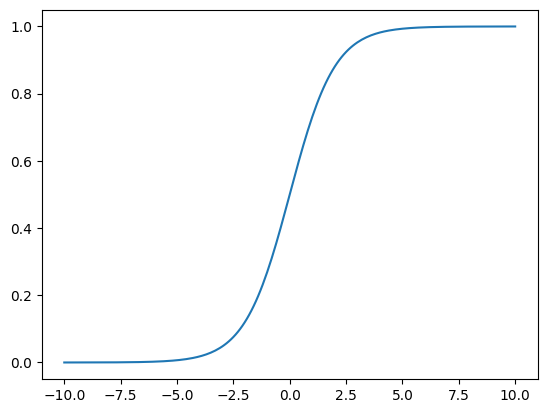

In [11]:
import matplotlib.pyplot as plt

#sigmoid 函数
x=torch.range(-10,10,0.1)
plt.plot(x,torch.sigmoid(x))
#torch.nn.functional.sigmoid()

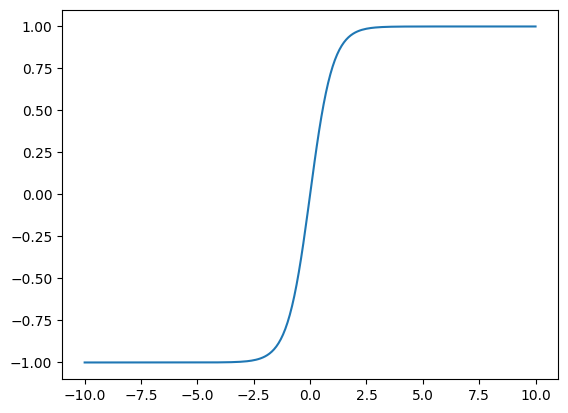

In [12]:
#tanh函数
plt.plot(x,torch.tanh(x))

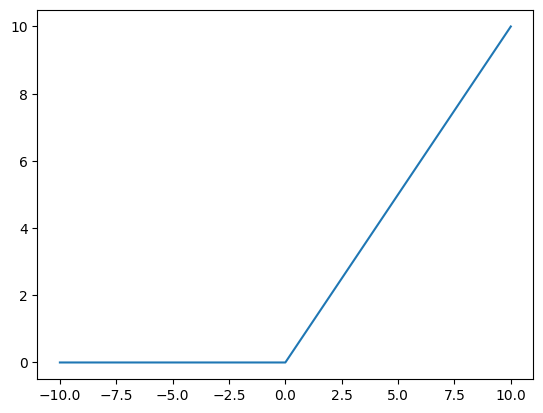

In [13]:
plt.plot(x,torch.relu(x))

<h3>自动微分(反向传播)</h3><br>
其实这个比较好理解，正向传播之前说的就是计算复合函数的过程，反向传播其实就是链式求导的方式，复合函数求导使用链式求导，这个大家就理解我就不赘述了



![](pic/反向传播.jpg)


In [14]:
#一个简单的例子  比如  y=3x+2  y在x=1的导数为3
x=torch.tensor(1,requires_grad=True,dtype=torch.float)
print(x)
y=3*x+2
y.backward()
print(x.grad)

#import math这里的数学方法只能用torch里面自带的，否则无法求导
#图中的例子
x1=torch.tensor(2,requires_grad=True,dtype=torch.float)
x2=torch.tensor(2,requires_grad=True,dtype=torch.float)
a=x1*x2
y1=torch.log(a)
y2=torch.sin(x2)
w=y1*y2

print

w.backward()

print('y1',y1)
print('y2',y2)
print('a',a)
print('x1',x1)
print('x2',x2)
print('w',w)

#这里能看出来 带grad_fn都是求不出来导数的
print(w.grad)
print(y1.grad)
print(y2.grad)
print(a.grad)
print(x1.grad)
print(x2.grad)


#如果x不是一个值，那么直接使用backward，需要传一个参数，如果不希望改变结果，直接*1就行，所以可以传ones_like(x)
x=torch.tensor([1,2,3],requires_grad=True,dtype=torch.float)
print(x)
y=3*x+2
y.backward(torch.ones_like(x))
print(x.grad)
print(x.grad)

#不使用梯度，提示性能
with torch.no_grad():
    y=3*x+2
    print(y.requires_grad)

tensor(1., requires_grad=True)
tensor(3.)
y1 tensor(1.3863, grad_fn=<LogBackward0>)
y2 tensor(0.9093, grad_fn=<SinBackward0>)
a tensor(4., grad_fn=<MulBackward0>)
x1 tensor(2., requires_grad=True)
x2 tensor(2., requires_grad=True)
w tensor(1.2606, grad_fn=<MulBackward0>)
None
None
None
None
tensor(0.4546)
tensor(-0.1223)
tensor([1., 2., 3.], requires_grad=True)
tensor([3., 3., 3.])
tensor([3., 3., 3.])
False


E:\Program\miniconda3\envs\d2l1\lib\site-packages\torch\_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:482.)
  return self._grad


<h1>卷积神经网络CNN</h1>




卷积神经网络主要包括: <br>
1.输入层(Input Layer)<br>
2.卷积层(Convolution Layer)<br>
3.激活层(ActivationLayer)<br>
4.池化层(Poling Layer)<br>
5.全连接层(Full-Connected Layer)<br>
6.输出层(Output Layer)
<br><h3>LeNet</h3>
![](pic/LeNet.jpg)

In [26]:
import torchvision
import torchvision.transforms as transforms

#首次把download=True 
mnist = torchvision.datasets.FashionMNIST(root = "FashionMNIST", train=True # 使用训练数据集
    , download=False 
    , transform=transforms.ToTensor() # 将数据转换为Tensor
    )


mnist_test = torchvision.datasets.FashionMNIST(root = "FashionMNIST", train=False # 使用训练数据集
    , download=False 
    , transform=transforms.ToTensor() # 将数据转换为Tensor
    )

image, label = mnist[0]
print(f"Image: {image.shape}, Label: {label}")
image, label = mnist_test[0]
print(f"Image: {image.shape}, Label: {label}")
#可以看到60000个28*28像素的样本
print(mnist.data.shape)
#可以看到60000个28*28像素的样本的标签
print(mnist.targets.shape)
print(mnist.targets[0:10])



Image: torch.Size([1, 28, 28]), Label: 9
Image: torch.Size([1, 28, 28]), Label: 9
torch.Size([60000, 28, 28])
torch.Size([60000])
tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


['Ankle boots', 'T-Shirt/Top', 'T-Shirt/Top', 'Dress', 'T-Shirt/Top', 'Pullover', 'Sneaker', 'Pullover', 'Sandals']


C:\Users\py\AppData\Local\Temp\ipykernel_11488\2897766118.py:21: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats("svg")


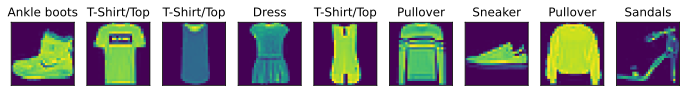

In [16]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
#画出样本类别
def get_text_label(labels):
    text_label = ["T-Shirt/Top"
                  ,"Trouser"
                  ,"Pullover"
                  ,"Dress"
                  ,"Coat"
                  ,"Sandals"
                  ,"Shirt"
                  ,"Sneaker"
                  ,"Bag"
                  ,"Ankle boots"
                  ]
    out = [text_label[int(i)] for i in labels]
    return out

def show_fashion_mnist(images, labels):
    display.set_matplotlib_formats("svg")
    _, figs = plt.subplots(1, len(images), figsize=(12,12))
    # _ 表示我们不使用的变量

    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28,28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

images, labels = [], []
#一共就9类
for i in range(9):
    #mnist[i]是一个二维张量，第一个是若干个数据样本，第二个是分类标签
    images.append(mnist[i][0])#任意取一个就可以
    labels.append(mnist[i][1])#取标签
#把一组数字转换成文本标签    
print(get_text_label(labels))
#每一类找一个图片展示一下
show_fashion_mnist(images, get_text_label(labels))


![](pic/LeNet.jpg)

![](pic/LeNet流程.jpg)

In [35]:

#这里有一点就是池化属于一种降维操作，不当成一层隐藏层，所以不需要激活函数
lenet=torch.nn.Sequential(
    #padding=2 是因为C1特征仍然需要28*28 如果不拓展两列最后会变成一个24*24的特征，维度会降低
    torch.nn.Conv2d(1,6,kernel_size=5,padding=2), torch.nn.Sigmoid(),
    #池化降维成14*14特征图
    torch.nn.AvgPool2d(kernel_size=2, stride=2),
    #不用填充了，自动降维成10*10，输出16个通道
    torch.nn.Conv2d(6,16,kernel_size=5),torch.nn.Sigmoid(),
    #降维成5*5特征图
    torch.nn.AvgPool2d(kernel_size=2, stride=2),
    #转换成1维数据
    torch. nn.Flatten(),
    #将一维450数据转换成120数据
    torch.nn.Linear(16*5*5,120),torch.nn.Sigmoid(),
    #将一维120数据转换成84数据
    torch.nn.Linear(120,84),torch.nn.Sigmoid(),
    #最后转成10类数据
    torch.nn.Linear(84,10),
)

X = torch.rand(size=(1,1, 28, 28), dtype=torch.float32)
for layer in lenet:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)


#这个比如传入4维度的 否则Flatten时会有问题 输出一下就看到了
#X = torch.rand(size=(1, 28, 28), dtype=torch.float32)
#for layer in lenet:
#    X = layer(X)
#    print(layer.__class__.__name__,'output shape: \t',X.shape)

Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])
Conv2d output shape: 	 torch.Size([6, 28, 28])
Sigmoid output shape: 	 torch.Size([6, 28, 28])
AvgPool2d output shape: 	 torch.Size([6, 14, 14])
Conv2d output shape: 	 torch.Size([16, 10, 10])
Sigmoid output shape: 	 torch.Size([16, 10, 10])
AvgPool2d output shape: 	 torch.Size([16, 5, 5])
Flatten output shape: 	 torch.Size([16, 25])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x25 and 400x120)

In [22]:
#这里用传统方式描述一下梯度下降的细节
#取上述图片然后两步简化一下
import numpy as np

#将6w个样本的120维度数据转换成84个最后转换成10 没发用6w数据量太大python溢出了 哈哈
x=np.random.randn(600,120)
y=np.random.randn(600,10)

#设置参数
w_1=np.random.randn(120,84)
w_2=np.random.randn(84,10)

#设置学习率
learning_rate=0.000001

for t in range(500):
    #计算隐藏层
    #size 60000 84
    h=x.dot(w_1)
    #rule激活函数计算，通过np方式实现也很简单，这里我想当年没有pytorch的时候应该都是这么实现的吧
    
    #size 6000*84
    h_relu=np.maximum(h, 0)
    #计算输出层
    y_pred=h_relu.dot(w_2)
    
    #这里是通过最小二次计算损失函数，因为不是公式推导，前门加不加那个1/2都行
    loss=np.square(y_pred-y).sum()
    if t%100==0:
        #每100次输出一下损失函数
        print('loss',loss)
    
    #就是损失函数求导
    #fw1的导数为2*(y_pred-y)*w2x
    #fw2的导数为2*(y_pred-y)*w1x
    #其中w1*x结果就为h 使用激活函数后结果变为h_relu
    #size
    grad_y_pred=2.0*(y_pred-y)
    
    #根据公式w2的梯度为
    #120*84= 84*6000   6000*10 就能理解为什么h_relu需要转置了
    w2_grad=h_relu.T.dot(grad_y_pred)
    
    #w1的梯度稍微复杂点，因为没有方法能直接得到relu激活后的函数
    # 120*84     120*60000 6000*10  10*84
    
    
    tmp=grad_y_pred.dot(w_2.T)
    #使结果转到激活函数之前
    tmp1=tmp.copy()
    tmp1[h<0]=0
    
    w1_grad=x.T.dot(tmp1)
    
    w_1-=learning_rate*w1_grad
    
    w_2-=learning_rate*w2_grad
   # if t%100==0:
    # print('w_1',w_1)
     #print('w_2',w_2)
    

loss 23332290.566040978
loss 223862.97986647996
loss 53447.81612639168
loss 20179.785751668107
loss 10719.14641963764


<h3>梯度下降公式:<br></h3>
<h3>w<sub>1</sub>=w<sub>1</sub>-a*loss<sub>w1</sub>(x)<br></h3>

<h3>w<sub>2</sub>=w<sub>2</sub>-a*loss<sub>w2</sub>(x)<br></h3>


In [25]:
#pytorch版本重写上例

x=torch.randn(600,120)
y=torch.randn(600,10)
w_1=torch.randn(120,84)
w_2=torch.randn(84,10)

#设置学习率
learning_rate=0.0001

#使用pytorch方式计算
model=torch.nn.Sequential(
    torch.nn.Linear(120,84), torch.nn.ReLU(),
    torch.nn.Linear(84,10), torch.nn.ReLU(),
)

#定义最小二乘
loss_fn=torch.nn.MSELoss(reduction='sum')

#使用pytorch权值更新方式，因为如果自己实现，那么对于很多梯度下降算法手写比较复杂
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred=model(x)
    loss=loss_fn(y_pred,y)
    if t%100==0:
        #每100次输出一下损失函数
        print('loss',loss.item())
    #梯度清0，如果不清楚，因为已经进行一个求导了，后面就变成求二阶导了    
    optimizer.zero_grad()
    #直接对梯度进行求导
    loss.backward()
    #这样就更新参数了，非常方便
    optimizer.step()
    


loss 5998.51806640625
loss 5631.63818359375
loss 5361.81103515625
loss 5098.44384765625
loss 4850.341796875


In [79]:
#设置测试集评估函数
#数据集为1w个
def evaluate_accuracy(lenet, data_iter):
    
    images, labels = [], []
    i=0
    for  (X, y) in data_iter:
       y_hat=lenet(X.unsqueeze(0))
       images.append(data_iter[i][0])
       labels.append(y_hat.argmax().item)
       if(y_hat.argmax()==y):
           i+=1
    print('准确率为:',str(i/10000))
    #show_fashion_mnist(images[0:15], get_text_label[0:15])

In [80]:
#训练图片识别效果
def train(lenet, train_iter, test_iter, num_epochs, lr):
    def init_weights(m):
        if type(m) == torch.nn.Linear or type(m) == torch.nn.Conv2d:
            #此方式初始化每一层函数，防止梯度消失和梯度爆炸
            torch.nn.init.xavier_uniform_(m.weight)
    lenet.apply(init_weights)
    
    #使用sgd梯度下降方法
    optimizer = torch.optim.SGD(lenet.parameters(), lr=lr)
    #使用分类的损失函数
    loss = torch.nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        # 训练损失之和，训练准确率之和，样本数
        
        #model.train()可以启用batch normalization和dropout。这对于模型的训练过程非常重要，因为BN层和Dropout层在训练和评估时的行为是不同的。
        #Batch Normalization‌：在训练模式下，BN层会使用每一批数据的均值和方差来进行归一化，这样可以保证模型在训练过程中能够稳定地学习。如果模型在评估模式下运行BN层，它可能会使用全部训练数据的均值和方差，这通常会导致性能下降‌12。
        #‌Dropout‌：在训练模式下，Dropout层会随机丢弃一部分神经元，这样可以防止模型过拟合。在评估模式下，Dropout层不会进行这种随机丢弃，所有的神经元都会被使用‌
        lenet.train()
        
        for i, (X, y) in enumerate(train_iter):
            #X y分别是样本数据和标签
            #清楚梯度梯度
            optimizer.zero_grad()
            #使用模型结算结果，这里时三维计算会有问题 生维到4维度
            y_hat = lenet(X.unsqueeze(0))
            #print(y_hat)
            #print(y)
            #计算损失
            #y_hat是二维度，y需要转换成tensor再降维度
            l = loss(y_hat, torch.tensor(y).unsqueeze(0))
            #求导并更新参数
            l.backward()
            optimizer.step()
            

   
    test_acc = evaluate_accuracy(lenet, test_iter)
        

lr, num_epochs = 0.9, 10
train(lenet, mnist, mnist_test, num_epochs, lr)
#evaluate_accuracy(lenet, mnist_test)

准确率为: 0.1


<h2>其他网络类型 </h2>
有需要的时候再查找使用<br>

AlexNet。它是第一个在大规模视觉竞赛中击败传统计算机视觉模型的大型神经网络；

使用重复块的网络（VGG）。它利用许多重复的神经网络块；

网络中的网络（NiN）。它重复使用由卷积层和
卷积层（用来代替全连接层）来构建深层网络;

含并行连结的网络（GoogLeNet）。它使用并行连结的网络，通过不同窗口大小的卷积层和最大汇聚层来并行抽取信息；

残差网络（ResNet）。它通过残差块构建跨层的数据通道，是计算机视觉中最流行的体系架构；

稠密连接网络（DenseNet）。它的计算成本很高，但给我们带来了更好的效果。

In [1]:
from d2l import torch as d2l
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

print(len(train_iter))
print(len(vocab))

TypeError: object of type 'SeqDataLoader' has no len()

In [5]:
import collections
import re
from d2l import torch as d2l

#@save
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt',
                                '090b5e7e70c295757f55df93cb0a180b9691891a')

def read_time_machine():  #@save
    """将时间机器数据集加载到文本行的列表中"""
    with open(d2l.download('time_machine'), 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]

#返回每一行的分词
def tokenize(lines, token='word'):  #@save
    return [line.split() for line in lines]

#返回词频降序
'''
Counter({'the': 2261, 'i': 1267, 'and': 1245, 'of': 1155, 'a': 816, 'to': 695, 'was': 552, 'in': 54...})
'''
def count_corpus(tokens):  #@save
    tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

lines = read_time_machine()
print(f'# 文本总行数: {len(lines)}')






# 文本总行数: 3221
['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
[]
[]
[]
['i']
[]
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him']
['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and']
['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']
Counter({'the': 2261, 'i': 1267, 'and': 1245, 'of': 1155, 'a': 816, 'to': 695, 'was': 552, 'in': 541, 'that': 443, 'my': 440, 'it': 437, 'had': 354, 'me': 281, 'as': 270, 'at': 243, 'for': 221, 'with': 216, 'but': 204, 'time': 200, 'were': 158, 'this': 152, 'you': 137, 'on': 137, 'then': 134, 'his': 129, 'there': 127, 'he': 123, 'have': 122, 'they': 122, 'from': 122, 'one': 120, 'all': 118, 'not': 114, 'into': 114, 'upon': 113, 'little': 113, 'so': 112, 'is': 106, 'came': 105, 'by': 103, 'some': 94, 'be': 93, 'no': 92, 'could': 92, 'their': 91, 'said': 89, 'saw': 88, 'down': 87, 'them': 86, 'machine'

In [18]:
def count_corpus(tokens):  #@save
    """统计词元的频率"""
    # 这里的tokens是1D列表或2D列表
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # 将词元列表展平成一个列表
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

#神经网络没办法直接用文本来跑，对于每个单词，通过一个词典表给他设置一个索引，然后用索引表示单词
class Vocab:  #@save
    """文本词表"""
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        #统计单词频率
        counter = count_corpus(tokens)
        #按照次品降序排列
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                   reverse=True)
        
        #print('self._token_freqs',self._token_freqs)
        # 未知词元的索引为0,位置词元用'<unk>'表示
        self.idx_to_token = ['<unk>'] #+ reserved_tokens
        print('self.idx_to_token',self.idx_to_token)
        #添加到词典
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}
       
        #过滤掉少于min_freq频率的单词，但是方法默认为0，所以不会过滤
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1

    def __len__(self):
        return len(self.idx_to_token)
    #根据单词反馈索引
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]
   #根据索引返回单词
    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

    @property
    def unk(self):  # 未知词元的索引为0
        return 0

    @property
    def token_freqs(self):
        return self._token_freqs


tokens = tokenize(lines)
vocab = Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])

for i in range(11):
    indices=vocab.__getitem__(tokens[i])
    print(vocab.__getitem__(tokens[i]))
    print(vocab.to_tokens(indices))
#print(count_corpus(tokens))


#print(vocab.__getitem__(tokens))

self.idx_to_token ['<unk>']
[('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('was', 7), ('in', 8), ('that', 9)]
[1, 19, 50, 40, 2183, 2184, 400]
['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
[]
[]
[]
[]
[]
[]
[]
[2]
['i']
[]
[]
[]
[]
[1, 19, 71, 16, 37, 11, 115, 42, 680, 6, 586, 4, 108]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him']
[7, 1420, 5, 2185, 587, 6, 126, 25, 330, 127, 439, 3]
['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and']
[2186, 3, 25, 1044, 362, 113, 7, 1421, 3, 1045, 1]
['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']


In [26]:
def load_corpus_time_machine(max_tokens=-1):  #@save
    """返回时光机器数据集的词元索引列表和词表"""
    #获取time_machine的所有行
    lines = read_time_machine()
    #返回每一行的字母，注意这里和上面不同，上面是单词，这里是每个字母
    tokens=[list(line) for line in lines]
    #获取整个字母集合的索引表
    vocab = Vocab(tokens)

    # 因为时光机器数据集中的每个文本行不一定是一个句子或一个段落，
    
    # 这代码给你写的那叫一个秀啊，这里的意思就是把整个time_machine这本书转为一个一位的索引数组，这代码让我写我写不出来
    corpus = [vocab[token] for line in tokens for token in line]
    print(corpus)
    #这里这里了max_tokens可以通过方法取得任意前多少个
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus, vocab

corpus, vocab = load_corpus_time_machine()
#这里返回的就是两个，一个是这本书前多少个字母索引，注意不是单词，另外一个返回的是字母索引表，书中也叫词元
len(corpus), len(vocab)

self.idx_to_token ['<unk>']
[3, 9, 2, 1, 3, 5, 13, 2, 1, 13, 4, 15, 9, 5, 6, 2, 1, 21, 19, 1, 9, 1, 18, 1, 17, 2, 12, 12, 8, 5, 3, 9, 2, 1, 3, 5, 13, 2, 1, 3, 10, 4, 22, 2, 12, 12, 2, 10, 1, 16, 7, 10, 1, 8, 7, 1, 5, 3, 1, 17, 5, 12, 12, 1, 21, 2, 1, 15, 7, 6, 22, 2, 6, 5, 2, 6, 3, 1, 3, 7, 1, 8, 20, 2, 4, 23, 1, 7, 16, 1, 9, 5, 13, 17, 4, 8, 1, 2, 24, 20, 7, 14, 6, 11, 5, 6, 18, 1, 4, 1, 10, 2, 15, 7, 6, 11, 5, 3, 2, 1, 13, 4, 3, 3, 2, 10, 1, 3, 7, 1, 14, 8, 1, 9, 5, 8, 1, 18, 10, 2, 19, 1, 2, 19, 2, 8, 1, 8, 9, 7, 6, 2, 1, 4, 6, 11, 3, 17, 5, 6, 23, 12, 2, 11, 1, 4, 6, 11, 1, 9, 5, 8, 1, 14, 8, 14, 4, 12, 12, 19, 1, 20, 4, 12, 2, 1, 16, 4, 15, 2, 1, 17, 4, 8, 1, 16, 12, 14, 8, 9, 2, 11, 1, 4, 6, 11, 1, 4, 6, 5, 13, 4, 3, 2, 11, 1, 3, 9, 2, 16, 5, 10, 2, 1, 21, 14, 10, 6, 2, 11, 1, 21, 10, 5, 18, 9, 3, 12, 19, 1, 4, 6, 11, 1, 3, 9, 2, 1, 8, 7, 16, 3, 1, 10, 4, 11, 5, 4, 6, 15, 2, 1, 7, 16, 1, 3, 9, 2, 1, 5, 6, 15, 4, 6, 11, 2, 8, 15, 2, 6, 3, 12, 5, 18, 9, 3, 8, 1, 5, 6, 1, 3, 9, 2, 1

(170580, 28)

In [22]:
print()
lines = read_time_machine()
tokens=[list(line) for line in lines]
vocab = Vocab(tokens)
print(vocab.token_to_idx)


self.idx_to_token ['<unk>']
{'<unk>': 0, ' ': 1, 'e': 2, 't': 3, 'a': 4, 'i': 5, 'n': 6, 'o': 7, 's': 8, 'h': 9, 'r': 10, 'd': 11, 'l': 12, 'm': 13, 'u': 14, 'c': 15, 'f': 16, 'w': 17, 'g': 18, 'y': 19, 'p': 20, 'b': 21, 'v': 22, 'k': 23, 'x': 24, 'z': 25, 'j': 26, 'q': 27}


学习语言模型<br>

![](pic/学习语言模型.jpg)


self.idx_to_token ['<unk>']


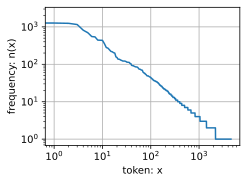

In [28]:
tokens = tokenize(d2l.read_time_machine())
# 因为每个文本行不一定是一个句子或一个段落，因此我们把所有文本行拼接到一起
'''
通过此图我们可以发现：词频以一种明确的方式迅速衰减。 将前几个单词作为例外消除后，剩余的所有单词大致遵循双对数坐标图上的一条直线。 这意味着单词的频率满足齐普夫定律（Zipf’s law）， 即第个最常用单词的频率为：
'''
corpus = [token for line in tokens for token in line]
vocab = Vocab(corpus)
vocab.token_freqs[:10]
#通过所有词频的降序，token, freq主要freq怕你率就行   为了画图，主要意图是次品衰减的很快
freqs = [freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',
         xscale='log', yscale='log')

self.idx_to_token ['<unk>']


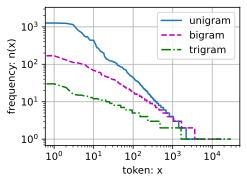

In [32]:
#这里他的意思
#print(corpus)
#这里的意思是从第一个开始都一个都连续取两个，看那两年连在一起的单词频率最高
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab = Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]
#这里就是连续三个了
trigram_tokens = [triple for triple in zip(
    corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab = d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

#更上图一样
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]

d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',
         ylabel='frequency: n(x)', xscale='log', yscale='log',
         legend=['unigram', 'bigram', 'trigram'])


![](pic/奇普夫定律.jpg)


In [52]:
import math
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

batch_size, num_steps = 32, 35

#这个load_data_time_machine是由多个方法整合的，
#简单说一下这个数据返回一个什么结构
'''
 train_iter中的数据是一个[2,32,35]维度的数据
 相当于一个X一个Y 分别是[32，35]维度
 也就是32个连续35词元的一段
 这个方法他采取的是顺序采用  就是对于每一个x或者每个一个y的一段都是彼此相连的，从段落格式来看
 
 vocab是词元的词典
 
'''
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)
print(train_iter[0].shape)

#这里需要one-hot编码，因为一个词元对应的是一个数字，本质但是单词是有限分类的，离散的，不应该用连续型的数字表示，所以使用one-hot编码他是一个多维的向量，每一个向量表示改值属不属于这个分类

F.one_hot(torch.tensor([0, 2]), len(vocab))

TypeError: 'SeqDataLoader' object is not subscriptable

![](pic/循环神经网络公式1.jpg)

![](pic/循环神经网络公式2.png)


![](pic/循环神经网络公式3.jpg)

In [77]:
def get_params(vocab_size, num_hiddens):
    #vocab_size 等于词典中词元的个数
    num_inputs = num_outputs = vocab_size
    #每次输入的是一个词元，他肯定属于词典中一个，根据ont-hot编码，他的维度是[vocab_size*vocab_size]的没有问题，他输出也是ont-hot所以也是[vocab_size*vocab_size
    
    #初始化函数
    def normal(shape):
        return torch.randn(size=shape) * 0.01

    # 隐藏层参数
    W_xh = normal((num_inputs, num_hiddens))
    W_hh = normal((num_hiddens, num_hiddens))
    b_h = torch.zeros(num_hiddens)
    
    # 输出层参数
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs)
    # 附加梯度
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

def rnn(inputs, state, params):
    # inputs的形状：(时间步数量，批量大小，词表大小)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    # X的形状：(批量大小，词表大小)
    for X in inputs:
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
        Y = torch.mm(H, W_hq) + b_q
       # print(Y.shape)
        outputs.append(Y)
   # print(len(outputs))
    return torch.cat(outputs, dim=0), (H,)

def init_rnn_state(batch_size, num_hiddens):
    return (torch.zeros((batch_size, num_hiddens)), )

class RNNModelScratch: #@save
    """从零开始实现的循环神经网络模型"""
    def __init__(self, vocab_size, num_hiddens,
                 get_params, init_state, forward_fn):
        #设置参数
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens  
        self.params = get_params(vocab_size, num_hiddens)
        self.init_state, self.forward_fn = init_state, forward_fn

    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size):
        return self.init_state(batch_size, self.num_hiddens,)
    


In [70]:
num_hiddens = 512
print(len(vocab))
#len(vocab) 为 28  隐藏曾为512
'''
初始化参数维度如下:
W_xh 28*512
W_hh 512*512
b_h  512*1
W_hq 512*28
b_h  28*1
'''
net = RNNModelScratch(len(vocab), num_hiddens, get_params,init_rnn_state, rnn)

#X的形状为2*5
X = torch.arange(10).reshape((2, 5))


#这是一个2*512维的全0数据
state = net.begin_state(X.shape[0])

#这里首先把输入参数X做one-hot编码 变成5*2*28维向量
'''
调用call方法计算
H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
对于每个X
  torch.mm(X, W_xh) 为2*512 
  torch.mm(H, W_hh) 为2*512  H初始为state
  H为2*512
这个H作为新的state返回相当，在下一次计算里继续充当H也就是隐藏层函数
然后计算Y
Y = torch.mm(H, W_hq) + b_q
  Y变成2*28 跟X的维度一直 ，这是肯定的本身就是根据这个词元预测下一个词元
'''



#然后把y转成一维向量
Y, new_state = net(X, state)
#
print(Y.shape)
print(new_state)
#Y.shape, len(new_state), new_state[0].shape
#state = net.begin_state(X.shape[0], d2l.try_gpu())
#Y, new_state = net(X.to(d2l.try_gpu()), state)
#Y.shape, len(new_state), new_state[0].shape

28
torch.Size([2, 28])
torch.Size([2, 28])
torch.Size([2, 28])
torch.Size([2, 28])
torch.Size([2, 28])
5
torch.Size([10, 28])
(tensor([[-0.0022, -0.0033, -0.0010,  ...,  0.0067, -0.0032,  0.0213],
        [ 0.0090, -0.0159,  0.0029,  ..., -0.0118,  0.0064, -0.0110]],
       grad_fn=<TanhBackward0>),)


In [82]:
'''
输入一段字符串’time traveller '
1.首先他先截图第一个词元t的字典索引
2.然后获取后面的ime traveller '用于训练
训练过程如下

先生成一个1*512维度的全0张量

依次取得ime traveller 的每个词元
把每个词元转换通过one-hot转为28*28维度向量

初始化参数维度如下:
W_xh 28*512
W_hh 512*512
b_h  512*1
W_hq 512*28
b_h  28*1

调用call方法计算

= torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
对于每个X
  torch.mm(X, W_xh) 为2*512 
  torch.mm(H, W_hh) 为2*512  H初始为state
  H为2*512
然后计算Y
Y = torch.mm(H, W_hq) + b_q
  Y变成2*28 跟X的维度一直 ，这是肯定的本身就是根据这个词元预测下一个词元
'''


'''
所以怎么理解好呢
每一次计算，相当于就在通过一个一个隐藏层的全连接神经网络也预测回归结果
输入-隐藏层-激活函数-输出层这样，但是在激活函数中除了要计算输入到全连接的值
还要考虑之前全连接层的影响，这个影响通过隐藏层状态H来实现
隐藏层状态是(上一个隐藏层+上一个银承状态*权重函数的激活函数)

这个流程实际上你发现，他就是在训练隐藏层状态，但是这个状态其实也是随机训练。因为他没有考虑损失
这里后面的字符其实某种角度来说就是随机生成的，他其实就迭代了一个隐藏层状态函数
后面的代码会通过梯度下降训练巡视函数
'''
def predict_ch8(prefix, num_preds, net, vocab):  #@save
    """在prefix后面生成新字符"""
    state = net.begin_state(batch_size=1)
    outputs = [vocab[prefix[0]]]
    get_input = lambda: torch.tensor([outputs[-1]]).reshape((1, 1))
    print(get_input())
    for y in prefix[1:]:  # 预热期
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
        print(_)
       # print(state)
    for _ in range(num_preds):  # 预测num_preds步
        y, state = net(get_input(), state)
        print('y',y)
        #他讲结果最大的索引范围，就是sotfmax分类
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])


predict_ch8('time traveller ', 10, net, vocab)

tensor([[3]])
torch.Size([1, 28])
1
tensor([[-8.6104e-04, -2.4794e-03,  3.7177e-03,  1.2290e-04,  1.5715e-03,
          1.5287e-03,  3.3109e-05, -9.3318e-04, -1.5279e-03, -1.9475e-03,
         -1.8035e-03, -2.7750e-03, -5.4731e-04, -1.1631e-03, -3.8718e-03,
          1.8305e-03, -4.2514e-03, -1.1709e-03,  4.2815e-03, -2.2441e-03,
         -1.0850e-03, -2.2447e-03, -1.6281e-03, -1.5406e-03, -2.5298e-03,
          2.7384e-03,  1.8206e-03, -1.9253e-03]], grad_fn=<CatBackward0>)
torch.Size([1, 28])
1
tensor([[ 2.1256e-03, -2.6157e-03,  6.0642e-04,  1.3694e-03,  4.5981e-06,
         -2.1145e-03,  1.4350e-03, -3.9879e-03, -5.4588e-03,  1.4213e-03,
          2.4999e-03,  3.2709e-03, -3.7603e-04, -8.3320e-04, -7.2305e-04,
          3.4982e-03, -2.9397e-04, -2.0387e-03, -3.5357e-03,  3.2165e-03,
         -1.6348e-03,  3.1413e-04, -1.8035e-04, -6.4087e-04, -3.0509e-04,
          1.0102e-03,  1.9798e-03,  2.3344e-04]], grad_fn=<CatBackward0>)
torch.Size([1, 28])
1
tensor([[ 0.0002,  0.0041, -0.00

'time traveller luiruanyca'

In [87]:
 #这里的意思就是对循环神经网络使用梯度下降它可能导致数值不稳定， 例如可能导致梯度爆炸或梯度消失
#所以适当减小梯度，虽然下降的慢但是更稳定，当然这个也是改善不能从根本上避免这个问题
#所以这个如果对梯度进行归一化防止过大
def grad_clipping(net, theta):  #@save
    """裁剪梯度"""
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

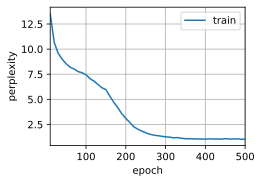

In [91]:
#@save
def train_epoch_ch8(net, train_iter, loss, updater, use_random_iter):
    """训练网络一个迭代周期（定义见第8章）"""
    state, timer = None, d2l.Timer()
    metric = d2l.Accumulator(2)  # 训练损失之和,词元数量
    
    for X, Y in train_iter:
        if state is None or use_random_iter:
            #  在第一次迭代或使用随机抽样时初始化state 还是一样的
            #初始化一个32*35*28维度的向量
            state = net.begin_state(batch_size=X.shape[0])
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                # state对于nn.GRU是个张量
                #改变自身不要求梯度 相当于requires_grad设置为False
                state.detach_()
            else:
                # state对于nn.LSTM或对于我们从零开始实现的模型是个张量
                for s in state:
                    #改变自身不要求梯度 相当于requires_grad设置为False
                    s.detach_()
        
        y = Y.T.reshape(-1)
        #变成一维
       # X, y = X.to(device), y.to(device)
        #计算(X的预测)
        #这里说一下XY 采样是什么，x一个23维度每个维度35的词元，因为是顺序采样
        #可以把正本书从头开始每35分为一个段落，然后每一个按照顺序分给每个x，然后再分一边
        #y和x的不同的y的取样顺序加了个，你可以理解对于x、y相同的顺序y就是x下一个词元，从函数
        #角度也可以结果
        y_hat, state = net(X, state)
        #计算损失函数
        l = loss(y_hat, y.long()).mean()
        #根据损失函数计算梯度，这里他判断你使用是否用pytorch实现
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            #梯度先归一化然后在下降
            grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            # 因为已经调用了mean函数，这个他手工更新梯度，这个计算梯度太麻烦所以方法他也封装了
            updater(batch_size=1)
        metric.add(l * y.numel(), y.numel())
    return math.exp(metric[0] / metric[1]), metric[1] / timer.stop()

#@save
def train_ch8(net, train_iter, vocab, lr, num_epochs,
              use_random_iter=False):
    #定义随时函数，分类方法都是交叉熵函数来定义的，计算评估错误的程度
    loss = nn.CrossEntropyLoss()
    
    #这里是画图象，先不研究，这个地方有的研究
    animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train'], xlim=[10, num_epochs])
    
    # 初始化
    #使用随机梯度下降，这里他学习率定义为1不知道为啥
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
    #有些奇怪，如果你看这个方法，实际上使用梯度除以批次变成批处理梯度下降了
        updater = lambda batch_size: d2l.sgd(net.params, lr, batch_size)
    
    #上来就预测50个单词了。。。。
    predict = lambda prefix: predict_ch8(prefix, 50, net, vocab)
    # 训练和预测
    #循环500次,展示图像
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(
            net, train_iter, loss, updater, use_random_iter)
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller'))
            animator.add(epoch + 1, [ppl])
    print(f'困惑度 {ppl:.1f}, {speed:.1f} 词元/秒 ')
    print(predict('time traveller'))
    print(predict('traveller'))

net = RNNModelScratch(len(vocab), num_hiddens, get_params,init_rnn_state, rnn)
'''
 train_iter中的数据是一个[2,32,35]维度的数据
 相当于一个X一个Y 分别是[32，35]维度
 也就是32个连续35词元的一段
 这个方法他采取的是顺序采用  就是对于每一个x或者每个一个y的一段都是彼此相连的，从段落格式来看
 
 vocab是词元的词典
 
'''
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

num_epochs, lr = 500, 1
train_ch8(net, train_iter, vocab, lr, num_epochs)

In [85]:
x=torch.randn(3,5)
print(x)
print(x.reshape(-1))

tensor([[-0.6899, -1.8341, -0.6461, -1.8285,  0.6369],
        [-0.6952,  0.0212,  1.5847, -1.3441,  0.0489],
        [-0.2107, -0.6316, -0.5393,  1.3307,  2.4426]])
tensor([-0.6899, -1.8341, -0.6461, -1.8285,  0.6369, -0.6952,  0.0212,  1.5847,
        -1.3441,  0.0489, -0.2107, -0.6316, -0.5393,  1.3307,  2.4426])


In [93]:
#pytorch实现
#@save
class RNNModel(nn.Module):
    """循环神经网络模型"""
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        
        # 如果RNN是双向的（之后将介绍），num_directions应该是2，否则应该是1
        if not self.rnn.bidirectional:
            self.num_directions = 1
            self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)

    def forward(self, inputs, state):
        #one-hot编码
        X = F.one_hot(inputs.T.long(), self.vocab_size)
        #转变数据类型
        X = X.to(torch.float32)
        
        Y, state = self.rnn(X, state)
        # 全连接层首先将Y的形状改为(时间步数*批量大小,隐藏单元数)
        # 它的输出形状是(时间步数*批量大小,词表大小)。
        output = self.linear(Y.reshape((-1, Y.shape[-1])))
        return output, state

    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            # nn.GRU以张量作为隐状态
            return  torch.zeros((self.num_directions * self.rnn.num_layers,
                                 batch_size, self.num_hiddens),
                                device=device)
        else:
            # nn.LSTM以元组作为隐状态
            return (torch.zeros((
                self.num_directions * self.rnn.num_layers,
                batch_size, self.num_hiddens), device=device),
                    torch.zeros((
                        self.num_directions * self.rnn.num_layers,
                        batch_size, self.num_hiddens), device=device))

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

num_hiddens = 256


#= torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
'''
输入是1*32*58      
w_xh是28*256
h是
1*32*256

W_hh是256*256
= torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)


'''
rnn_layer = nn.RNN(len(vocab), num_hiddens)


#隐藏层状体权值是1*32*256 张量
state = torch.zeros((1, batch_size, num_hiddens))



#生成一个32*35*28的张量
X = torch.rand(size=(num_steps, batch_size, len(vocab)))

Y, state_new = rnn_layer(X, state)
Y.shape, state_new.shape


num_epochs, lr = 500, 1

#创建一个28*256的连接层
#可以理解为一个2**256的单层神经忘了




"\nfor epoch in range(num_epochs):\n   for X, Y in train_iter:\n      if state is None :\n        state = torch.zeros(1,32,256)\n      else:\n        state.detach_()\n      X = F.one_hot(X.T.long(),28)\n      X = X.to(torch.float32)\n      y_hat, state = rnn_net(X, state)  \n      y = Y.T.reshape(-1)\n      l = loss(y_hat, y.long()).mean()\n      predict = lambda prefix: predict_ch8(prefix, 50, net, vocab)\n\n# 训练和预测\n#循环500次,展示图像\n\n    ppl, speed = train_epoch_ch8(\n            net, train_iter, loss, updater, False)\n\n   \n    Output = mm_net(Y.reshape((-1, Y.shape[-1])))\n    updater.zero_grad()\n    l.backward()\n    grad_clipping(net, 1)\n    updater.step()    \n    metric.add(l * y.numel(), y.numel())\n\nprint(f'困惑度 {ppl:.1f}, {speed:.1f} 词元/秒 ')\nprint(predict('time traveller'))\nprint(predict('traveller'))\n"

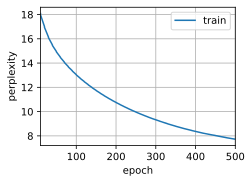

In [120]:
#全pytron版本

#获取数据集采用及词典
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)
#设置循环次数和学习率
num_epochs, lr = 500, 1
#设置隐藏层
num_hiddens =  torch.zeros(1,32,256)

#定义rnn网络
rnn_net = torch.nn.RNN(28, 256)
#定义全连接网络，这块我感觉不用也可以
nn_net=torch.nn.Linear(256,28)

#定义损失函数和优化器
loss = nn.CrossEntropyLoss()
updater = torch.optim.SGD(rnn_net.parameters(), lr)
animator = d2l.Animator(xlabel='epoch', ylabel='perplexity',
                            legend=['train'], xlim=[10, num_epochs])
'''
输入是1*32*58      
w_xh是28*256
h是
1*32*256

W_hh是256*256

'''

state, timer = None, d2l.Timer()
metric = d2l.Accumulator(2)  # 训练损失之和,词元数量
for epoch in range(num_epochs):
 for x,y in train_iter:

 
  state=torch.zeros(1, 32, 256)
  x = F.one_hot(x.T.long(),28)
  x =torch.tensor(x ,dtype=torch.float32)
#y_hat可以说是隐藏层 全连接的结果 state可以说的隐藏层状态
  #print(X.shape)
  #print(state.shape)
  outputs, state = rnn_net(x, state) 
  y = y.T.reshape(-1)
  y_hat = nn_net(outputs.reshape((-1, outputs.shape[-1])))
  #print(y_hat.shape)
 # print(y.shape)
  l = loss(y_hat, y.long()).mean()
  
  updater.zero_grad()
  l.backward()
  grad_clipping(net, 1)
  updater.step()  
  metric.add(l * y.numel(), y.numel())
  ppl, speed = math.exp(metric[0] / metric[1]), metric[1] / timer.stop()
  if (epoch + 1) % 10 == 0:
   # print(predict('time traveller'))
    animator.add(epoch + 1, [ppl])
  print(f'困惑度 {ppl:.1f}, {speed:.1f} 词元/秒 ')
  #print(predict('time traveller'))
  #print(predict('traveller'))
'''
for epoch in range(num_epochs):
   for X, Y in train_iter:
      if state is None :
        state = torch.zeros(1,32,256)
      else:
        state.detach_()
      X = F.one_hot(X.T.long(),28)
      X = X.to(torch.float32)
      y_hat, state = rnn_net(X, state)  
      y = Y.T.reshape(-1)
      l = loss(y_hat, y.long()).mean()
      predict = lambda prefix: predict_ch8(prefix, 50, net, vocab)

# 训练和预测
#循环500次,展示图像

    ppl, speed = train_epoch_ch8(
            net, train_iter, loss, updater, False)

   
    Output = mm_net(Y.reshape((-1, Y.shape[-1])))
    updater.zero_grad()
    l.backward()
    grad_clipping(net, 1)
    updater.step()    
    metric.add(l * y.numel(), y.numel())

print(f'困惑度 {ppl:.1f}, {speed:.1f} 词元/秒 ')
print(predict('time traveller'))
print(predict('traveller'))
'''

<h2>GRU门控制单元</h2>

 更新门
 Z = torch.sigmoid((X @ W_xz) + (H @ W_hz) + b_z)
 重置门
 R = torch.sigmoid((X @ W_xr) + (H @ W_hr) + b_r)
 候选隐状态
 H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
 隐状态
 H = Z * H + (1 - Z) * H_tilda
 Y = H @ W_hq + b_q
 每当更新门接近1时，模型就倾向只保留旧状态。 

 outputs.append(Y)<br>

 




 



 ![](pic/GRU门控制单元.jpg)
 




 

<h2>LSTM</h2>
输入门、遗忘门和输出门   H隐藏状态
I = torch.sigmoid((X @ W_ xi) + (H @ W_hi) + b_i)
F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
候选记忆元
C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)
C是上一个候选记忆元
C = F * C + I * C_tilda如果遗忘门始终为且输入门始终为 则过去的记忆元 将随时间被保存并传递到当前时间步。 
隐状态
H = O * torch.tanh(C)
Y = (H @ W_hq) + b_q
     

<h2>深度循环神经网络</h2>
由上面的rnn一层变成多层

<h2>循环循环神经网络</h2>
由深度神经网络中隐状态的单向变成双向